<a href="https://colab.research.google.com/github/Dr-Isam-ALJAWARNEH/ds-project-ESDA/blob/Progress-02%2F04%2F2024/spatial_join_sampling_thematic_maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Geospatial Data Science Handbook***
- Author: Dr. Isam Al Jawarneh
- Copyright (c) [2024] [Isam Al Jawarneh]

https://towardsdatascience.com/data-101s-spatial-visualizations-and-analysis-in-python-with-folium-39730da2adf

https://github.com/justinm0rgan/citibike-heatmap

#Prepare: Install the needed packages

In [1]:
# Install Folium library for creating interactive maps
!pip install folium
# Install uszipcode library for accessing US ZIP Code data
!pip install uszipcode
# Install pygeohash library for encoding and decoding geographical coordinates into geohashes
%pip install pygeohash
# Install Geopandas library for working with geospatial data
!pip install geopandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.2 MB/s eta 0:00:00
  Created wheel for atomicwrites: filename=atomicwrites-1.4.1-py2.py3-none-any.whl size=6941 sha256=0d9def649a47bb6fc4644cec28d21e782bcf42aaf77cf31a0c6713c3dada6af8
  Stored in directory: /root/.cache/pip/wheels/34/07/0b/33b15f68736109f72ea0bb2499521d87312b932620737447a2
Successfully built atomicwrites
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.29
    Uninstalling SQLAlchemy-2.0.29:
      Successfully uninstalled SQLAlchemy-2.0.29
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.

# Mount the drive

Mount the drive so that you can read the data from google drive

---



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import the Libraries

In [3]:
from pandas import Series, DataFrame # Import Series and DataFrame classes from pandas library
import pandas as pd # Import pandas library with alias pd
import numpy as np # Import numpy library with alias np
import plotly.graph_objs as go # Import graph objects module from plotly library with alias go
from IPython.display import Image # Import Image class from IPython.display module
import folium # Import folium library for creating interactive maps
from folium import IFrame # Import IFrame class from folium library
from folium.plugins import MarkerCluster # Import MarkerCluster plugin from folium.plugins module
from folium import plugins # Import plugins module from folium library
from datetime import datetime # Import datetime class from datetime module
import datetime as dt # Import datetime module with alias dt
import json # Import json module for working with JSON data
from scipy import stats # Import stats module from scipy library
import os # Import os module for interacting with the operating system
import matplotlib.pyplot as plt
import seaborn as sns

# CONFIG: Sampling Parameters

In [4]:
sampling_fraction = 0.6
geohash_precision = 6

# Loading Data & Analysis: Mobility Data

In [5]:
# Read the CSV file into a pandas DataFrame named "trips"
trips = pd.read_csv("/content/drive/MyDrive/Found. of DS Project/nyc_mobility/nyc1.csv")


In [6]:
#directoryPath = "/content/drive/MyDrive/Papers/dimensionality_reduction/datasets/NYC/trips/"

In [7]:
#Merge Multiple CSV Files in Python

In [8]:
'''file_path_1 ='/content/drive/MyDrive/Papers/dimensionality_reduction/datasets/NYC/pollution/NYC_Pilot1_PM.csv'
file_path_2 = "/content/drive/MyDrive/Papers/dimensionality_reduction/datasets/NYC/pollution/NYC_Pilot2_PM_Part1.csv"
file_path_3 = "/content/drive/MyDrive/Papers/dimensionality_reduction/datasets/NYC/pollution/NYC_Pilot2_PM_Part2.csv"
file_path_4 = "/content/drive/MyDrive/Papers/dimensionality_reduction/datasets/NYC/pollution/NYC_Pilot2_PM_Part3.csv"'''

'file_path_1 =\'/content/drive/MyDrive/Papers/dimensionality_reduction/datasets/NYC/pollution/NYC_Pilot1_PM.csv\'\nfile_path_2 = "/content/drive/MyDrive/Papers/dimensionality_reduction/datasets/NYC/pollution/NYC_Pilot2_PM_Part1.csv"\nfile_path_3 = "/content/drive/MyDrive/Papers/dimensionality_reduction/datasets/NYC/pollution/NYC_Pilot2_PM_Part2.csv"\nfile_path_4 = "/content/drive/MyDrive/Papers/dimensionality_reduction/datasets/NYC/pollution/NYC_Pilot2_PM_Part3.csv"'

In [9]:
'''import pandas as pd
files = [file_path_1, file_path_2,file_path_3,file_path_4]
trips = pd.DataFrame()
for file in files:
    data = pd.read_csv(file)
    trips = pd.concat([trips, data], axis=0)
#df.to_csv('nyc_pollution.csv', index=False)'''

"import pandas as pd\nfiles = [file_path_1, file_path_2,file_path_3,file_path_4]\ntrips = pd.DataFrame()\nfor file in files:\n    data = pd.read_csv(file)\n    trips = pd.concat([trips, data], axis=0)\n#df.to_csv('nyc_pollution.csv', index=False)"

In [10]:
# Return the type of the dataframe trips
type(trips)

pandas.core.frame.DataFrame

In [11]:
# Retrive the number of rows and number of columns in the dataframe trip
trips.shape

(1445285, 22)

In [12]:
# Retrieve the first 2 rows of the DataFrame trips to inspect its structure and content
trips.head(2)

id  VendorID lpep_pickup_datetime Lpep_dropoff_datetime Store_and_fwd_flag  \
0   0         2  2016-01-01 00:29:24   2016-01-01 00:39:36                  N   
1   1         2  2016-01-01 00:19:39   2016-01-01 00:39:18                  N   

   RateCodeID  Pickup_longitude  Pickup_latitude  Dropoff_longitude  \
0           1        -73.928642        40.680611         -73.924278   
1           1        -73.952675        40.723175         -73.923920   

   Dropoff_latitude  ...  Fare_amount  Extra  MTA_tax  Tip_amount  \
0         40.698044  ...          8.0    0.5      0.5        1.86   
1         40.761379  ...         15.5    0.5      0.5        0.00   

   Tolls_amount  Ehail_fee  improvement_surcharge  Total_amount  Payment_type  \
0           0.0        NaN                    0.3         11.16             1   
1           0.0        NaN                    0.3         16.80             2   

   Trip_type  
0        1.0  
1        1.0  

[2 rows x 22 columns]

In [13]:
'''import glob
import pandas as pd

trips = pd.DataFrame()
for file_name in glob.glob(directoryPath+'*.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    trips = pd.concat([trips,x],axis=0)'''
    #this is for multiple files

"import glob\nimport pandas as pd\n\ntrips = pd.DataFrame()\nfor file_name in glob.glob(directoryPath+'*.csv'):\n    x = pd.read_csv(file_name, low_memory=False)\n    trips = pd.concat([trips,x],axis=0)"

In [14]:
# Retrieve the number of columns in the DataFrame trips
columns=trips.shape[1]
print(columns)

# Retrieve the number of rows in the DataFrame trips
rows=trips.shape[0]
print(rows)

22
1445285


Convert datetime object column to datetime series

In [15]:
'''trips['time'] = pd.to_datetime(\
                trips['time'],dayfirst = True)
trips['time'] = pd.to_datetime(\
                trips['time'],dayfirst = True)'''


"trips['time'] = pd.to_datetime(                trips['time'],dayfirst = True)\ntrips['time'] = pd.to_datetime(                trips['time'],dayfirst = True)"

add columns month, time, day

# Remove erroneous coordinates (0,0) from the dataset - Mobility Data


In [16]:
# Rename the 'Pickup_longitude' column to 'longitude'
# Rename 'Pickup_latitude' column to 'latitude' in the DataFrame trips
# The 'inplace=True' parameter ensures that the changes are applied to the DataFrame itself
trips.rename(columns={'Pickup_longitude':'longitude', 'Pickup_latitude':'latitude'}, inplace=True)

In [17]:
# Filter the DataFrame trips to remove rows where the latitude is 0 and longitude is 0
trips = trips[(trips['latitude'] != 0 ) & (trips['longitude']!=0 )]

### Check the size before and after the filter

In [18]:
#Before the filter
print("Before filtering:", rows)

#After the filter
rows2=trips.shape[0]
print("After filtering: ", rows2)

Before filtering: 1445285
After filtering:  1442776


# Geohash - Mobility Data

### Import the libraries

In [19]:
!pip install pygeohash

In [20]:
import pygeohash as gh  # Import pygeohash library with alias gh for encoding and decoding geographic coordinates into geohashes
import geopandas as gpd  # Import the geopandas library with alias gpd for working with geospatial data

### Generate geohash for each tuple (long, lat)

In [21]:
# Measure the execution time of the code within this cell
%%time

# Encode latitude and longitude coordinates into geohashes and assign them to a new column 'geohash' in the DataFrame trips
# The lambda function applies the encoding operation to each row of the DataFrame using the specified geohash precision
trips['geohash'] = trips.apply(lambda x: gh.encode(x.latitude, x.longitude, precision=geohash_precision), axis=1)


CPU times: user 56 s, sys: 1.49 s, total: 57.5 s
Wall time: 1min 11s


In [22]:
# Measure the average execution time of the trips.head(2) operation
%timeit trips.head(2)

28.5 µs ± 6.57 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [23]:
# Display number of rows
trips.shape[0]

1442776

In [24]:
# Display the first 2 rows
trips.head(2)

id  VendorID lpep_pickup_datetime Lpep_dropoff_datetime Store_and_fwd_flag  \
0   0         2  2016-01-01 00:29:24   2016-01-01 00:39:36                  N   
1   1         2  2016-01-01 00:19:39   2016-01-01 00:39:18                  N   

   RateCodeID  longitude   latitude  Dropoff_longitude  Dropoff_latitude  ...  \
0           1 -73.928642  40.680611         -73.924278         40.698044  ...   
1           1 -73.952675  40.723175         -73.923920         40.761379  ...   

   Extra  MTA_tax  Tip_amount  Tolls_amount  Ehail_fee  improvement_surcharge  \
0    0.5      0.5        1.86           0.0        NaN                    0.3   
1    0.5      0.5        0.00           0.0        NaN                    0.3   

   Total_amount  Payment_type  Trip_type  geohash  
0         11.16             1        1.0   dr5rmt  
1         16.80             2        1.0   dr5rtj  

[2 rows x 23 columns]

### Convert trips to GeoPandas

In [25]:
# Return the type of the dataframe trip
type(trips)

pandas.core.frame.DataFrame

In [26]:
# Convert to Geopandas Geodataframe
%%time

# Create a GeoDataFrame gdf_trips from the DataFrame trips, specifying the geometry column using longitude and latitude coordinates
gdf_trips = gpd.GeoDataFrame(trips, geometry=gpd.points_from_xy(trips.longitude, trips.latitude))

CPU times: user 2.02 s, sys: 322 ms, total: 2.34 s
Wall time: 2.66 s


In [27]:
# Determine the type of object represented by the variable gdf_trips
type(gdf_trips)

geopandas.geodataframe.GeoDataFrame

In [28]:
# Print the Coordinate Reference System (CRS) of the GeoDataFrame gdf_trips
print(gdf_trips.crs)

None


In [29]:
# RUN the cell before
# Sample a fraction of the GeoDataFrame gdf_trips
# The sampling fraction determines the proportion of rows to be randomly sampled from the GeoDataFrame

gdf_trips=gdf_trips.sample(frac=sampling_fraction) # sampling_fraction = 0.6

In [30]:
# Print the Coordinate Reference System (CRS) of the GeoDataFrame gdf_trips - after the sampling (it should stay the same)
print(gdf_trips.crs)

None


In [31]:
# The CRS for trips should remain geographic 4326
gdf_trips = gdf_trips.set_crs('epsg:4326')
print(gdf_trips)

              id  VendorID lpep_pickup_datetime Lpep_dropoff_datetime  \
582871    582871         2  2016-01-13 12:29:48   2016-01-13 12:38:38   
358336    358336         2  2016-01-08 18:34:27   2016-01-08 18:45:45   
215959    215959         2  2016-01-05 13:12:03   2016-01-05 13:14:50   
238245    238245         1  2016-01-05 21:16:26   2016-01-05 21:20:20   
965182    965182         2  2016-01-21 11:57:18   2016-01-21 12:07:12   
...          ...       ...                  ...                   ...   
1111828  1111828         1  2016-01-25 15:31:58   2016-01-25 15:38:28   
1026179  1026179         2  2016-01-22 16:38:56   2016-01-22 16:46:28   
801001    801001         1  2016-01-17 14:28:09   2016-01-17 14:46:44   
1164018  1164018         1  2016-01-26 18:16:27   2016-01-26 18:29:32   
1122045  1122045         2  2016-01-25 19:38:17   2016-01-25 19:48:51   

        Store_and_fwd_flag  RateCodeID  longitude   latitude  \
582871                   N           1 -73.947479  40.81521

In [32]:
# Display the shape of the GeoDataFrame gdf_trips
gdf_trips.shape

(865666, 24)

In [33]:
# Display the first 2 rows of the GeoDataFrame gdf_trips
gdf_trips.head(2)

id  VendorID lpep_pickup_datetime Lpep_dropoff_datetime  \
582871  582871         2  2016-01-13 12:29:48   2016-01-13 12:38:38   
358336  358336         2  2016-01-08 18:34:27   2016-01-08 18:45:45   

       Store_and_fwd_flag  RateCodeID  longitude   latitude  \
582871                  N           1 -73.947479  40.815212   
358336                  N           1 -73.983734  40.686459   

        Dropoff_longitude  Dropoff_latitude  ...  MTA_tax  Tip_amount  \
582871         -73.938431         40.837742  ...      0.5        0.00   
358336         -73.975975         40.654678  ...      0.5        3.32   

        Tolls_amount  Ehail_fee  improvement_surcharge  Total_amount  \
582871           0.0        NaN                    0.3          9.30   
358336           0.0        NaN                    0.3         16.62   

        Payment_type  Trip_type  geohash                    geometry  
582871             2        1.0   dr72jq  POINT (-73.94748 40.81521)  
358336             1        1.0   dr5rkq  POINT (-73.98373 40.68646)  

[2 rows x 24 columns]

it additionally trips now has the geometry column

### Convert polygons to GeoPandas

In [34]:
# BASELINE: original Neighbourhoods

# Define the file path to the GeoJSON file containing NYC neighborhood polygons
geojson_file = "/content/drive/MyDrive/Found. of DS Project/nyc_polygon.geojson"

# Read the GeoJSON file and create a GeoDataFrame named neighborhoods_original
neighborhoods_original = gpd.read_file(geojson_file)

In [35]:
# Display the shape of the GeoDataFrame neighborhoods_original (rows, columns)
neighborhoods_original.shape

(310, 5)

In [36]:
# Display the first 2 rows of the GeoDataFrame neighborhoods_original
neighborhoods_original.head(2)

neighborhood boroughCode borough  \
0         Allerton           2   Bronx   
1  Alley Pond Park           4  Queens   

                                                 @id  \
0  http://nyc.pediacities.com/Resource/Neighborho...   
1  http://nyc.pediacities.com/Resource/Neighborho...   

                                            geometry  
0  POLYGON ((-73.84860 40.87167, -73.84582 40.870...  
1  POLYGON ((-73.74333 40.73888, -73.74371 40.739...

In [37]:
# Display the first 2 rows of the GeoDataFrame gdf_trips
gdf_trips.head(2)

id  VendorID lpep_pickup_datetime Lpep_dropoff_datetime  \
582871  582871         2  2016-01-13 12:29:48   2016-01-13 12:38:38   
358336  358336         2  2016-01-08 18:34:27   2016-01-08 18:45:45   

       Store_and_fwd_flag  RateCodeID  longitude   latitude  \
582871                  N           1 -73.947479  40.815212   
358336                  N           1 -73.983734  40.686459   

        Dropoff_longitude  Dropoff_latitude  ...  MTA_tax  Tip_amount  \
582871         -73.938431         40.837742  ...      0.5        0.00   
358336         -73.975975         40.654678  ...      0.5        3.32   

        Tolls_amount  Ehail_fee  improvement_surcharge  Total_amount  \
582871           0.0        NaN                    0.3          9.30   
358336           0.0        NaN                    0.3         16.62   

        Payment_type  Trip_type  geohash                    geometry  
582871             2        1.0   dr72jq  POINT (-73.94748 40.81521)  
358336             1        1.0   dr5rkq  POINT (-73.98373 40.68646)  

[2 rows x 24 columns]

### Spatial Analysis and Join Operations with GeoDataFrames
Keeping geometry column from both dataframes when applying sjoin() using GeoPandas
this is so because later on we group by NAME(district in Shenzhen)
also, the CRS (coordinate reference system) is 3857 in this case which is a projected CRS not geographic CRS, to calculate the distance corercctly between centroids
https://gis.stackexchange.com/questions/393387/keeping-geometry-column-from-both-dataframes-when-applying-sjoin-using-geopand

In [38]:
# Convert the geometry column to EPSG:3857 CRS for accurate spatial analysis.
neighborhoods_original['geometryn'] = neighborhoods_original.geometry.to_crs("epsg:3857")

In [39]:
# Retrieve the coordinate reference system (CRS) information from the GeoDataFrame gdf_trips
gdf_trips.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [40]:
# Retrieve the coordinate reference system (CRS) information from the GeoDataFrame neighborhoods_original
neighborhoods_original.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [41]:
# Retrieve the coordinate reference system (CRS) information from the 'geometryn' column of the GeoDataFrame neighborhoods_original
neighborhoods_original.geometryn.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [42]:
%%time
# Perform a spatial join between gdf_trips and neighborhoods_original, considering trips that are within neighborhood polygons.

#BASELINE
# we join by sjoin, but we have geohash so, we sample stratified by geohash
# so, we join only to get the metrics but the stratified sampling is based on the fine-grained division (geohash in this case)

# Store the result of the spatial join in the variable sjoined_trips_original.
sjoined_trips_original = gpd.sjoin(gdf_trips, neighborhoods_original, predicate="within")

CPU times: user 10.2 s, sys: 967 ms, total: 11.2 s
Wall time: 17.2 s


In [43]:
# Display the first 2 rows of the resulting GeoDataFrame.
sjoined_trips_original.head(2)

id  VendorID lpep_pickup_datetime Lpep_dropoff_datetime  \
582871  582871         2  2016-01-13 12:29:48   2016-01-13 12:38:38   
238245  238245         1  2016-01-05 21:16:26   2016-01-05 21:20:20   

       Store_and_fwd_flag  RateCodeID  longitude   latitude  \
582871                  N           1 -73.947479  40.815212   
238245                  N           1 -73.951805  40.810345   

        Dropoff_longitude  Dropoff_latitude  ...  Payment_type  Trip_type  \
582871         -73.938431         40.837742  ...             2        1.0   
238245         -73.941994         40.813728  ...             2        1.0   

        geohash                    geometry  index_right  neighborhood  \
582871   dr72jq  POINT (-73.94748 40.81521)          128        Harlem   
238245   dr72jj  POINT (-73.95181 40.81034)          128        Harlem   

        boroughCode    borough  \
582871            1  Manhattan   
238245            1  Manhattan   

                                                      @id  \
582871  http://nyc.pediacities.com/Resource/Neighborho...   
238245  http://nyc.pediacities.com/Resource/Neighborho...   

                                                geometryn  
582871  POLYGON ((-8230358.427 4987026.661, -8230342.4...  
238245  POLYGON ((-8230358.427 4987026.661, -8230342.4...  

[2 rows x 30 columns]

In [44]:
# Retrieve the type of the variable sjoined_trips_original, indicating the data type of the object it refers to.
type(sjoined_trips_original)

geopandas.geodataframe.GeoDataFrame

In [45]:
# Counting unique values
n = len(pd.unique(sjoined_trips_original['neighborhood']))
print("No.of.unique name values :", n)

No.of.unique name values : 215


In [46]:
# Retrieve the shape of the sjoined_trips_original GeoDataFrame, which indicates the number of rows and columns in the dataset.
sjoined_trips_original.shape

(864957, 30)

In [47]:
# Retrieve the data types of columns in the sjoined_trips_original GeoDataFrame, indicating the data type of each attribute or column.
sjoined_trips_original.dtypes

id                          int64
VendorID                    int64
lpep_pickup_datetime       object
Lpep_dropoff_datetime      object
Store_and_fwd_flag         object
RateCodeID                  int64
longitude                 float64
latitude                  float64
Dropoff_longitude         float64
Dropoff_latitude          float64
Passenger_count             int64
Trip_distance             float64
Fare_amount               float64
Extra                     float64
MTA_tax                   float64
Tip_amount                float64
Tolls_amount              float64
Ehail_fee                 float64
improvement_surcharge     float64
Total_amount              float64
Payment_type                int64
Trip_type                 float64
geohash                    object
geometry                 geometry
index_right                 int64
neighborhood               object
boroughCode                object
borough                    object
@id                        object
geometryn     

# SAMPLING AND MAP GENERATION

### SAMPLING - PERFORMANCE

###  Sampling by Geohash with Variable Sampling Fraction

In [ ]:
%%time
# Sampling by geohash change fraction sampling rate
# Group the spatially joined data 'sjoined_trips_original' by neighborhood
# Then within each neighborhood group, sample a fraction of the data based on the specified 'sampling_fraction'.

sampled_geohash_data_base= sjoined_trips_original.groupby('neighborhood').apply(lambda x: x.sample(frac=sampling_fraction)) #sampling_fraction = 0.6
# The resulting sampled data is stored in the 'sampled_geohash_data_base' variable.

CPU times: user 4.67 s, sys: 350 ms, total: 5.02 s
Wall time: 5.11 s


In [ ]:
# Retrieve the shape of the sampled_geohash_data_base DataFrame, indicating the number of rows and columns in the dataset.
sampled_geohash_data_base.shape

(518985, 30)

In [ ]:
# Print the first two rows
sampled_geohash_data_base.head(2)

id  VendorID lpep_pickup_datetime  \
neighborhood                                                 
Allerton     857749  857749         2  2016-01-18 21:02:15   
             548536  548536         2  2016-01-12 16:33:14   

                    Lpep_dropoff_datetime Store_and_fwd_flag  RateCodeID  \
neighborhood                                                               
Allerton     857749   2016-01-18 21:23:18                  N           1   
             548536   2016-01-12 16:52:00                  N           1   

                     longitude   latitude  Dropoff_longitude  \
neighborhood                                                   
Allerton     857749 -73.862343  40.865685         -73.941689   
             548536 -73.868164  40.858242         -73.835396   

                     Dropoff_latitude  ...  Payment_type  Trip_type  geohash  \
neighborhood                           ...                                     
Allerton     857749         40.818630  ...             2        1.0   dr72rp   
             548536         40.844788  ...             2        1.0   dr72rn   

                                       geometry  index_right  neighborhood  \
neighborhood                                                                 
Allerton     857749  POINT (-73.86234 40.86568)            0      Allerton   
             548536  POINT (-73.86816 40.85824)            0      Allerton   

                     boroughCode  borough  \
neighborhood                                
Allerton     857749            2    Bronx   
             548536            2    Bronx   

                                                                   @id  \
neighborhood                                                             
Allerton     857749  http://nyc.pediacities.com/Resource/Neighborho...   
             548536  http://nyc.pediacities.com/Resource/Neighborho...   

                                                             geometryn  
neighborhood                                                            
Allerton     857749  POLYGON ((-8220788.214 4993431.406, -8220479.3...  
             548536  POLYGON ((-8220788.214 4993431.406, -8220479.3...  

[2 rows x 30 columns]

In [ ]:
# Print the column names of the sampled_geohash_data_base DataFrame, showing the attributes present in the dataset.
print(sampled_geohash_data_base.columns)

Index(['id', 'VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'longitude', 'latitude',
       'Dropoff_longitude', 'Dropoff_latitude', 'Passenger_count',
       'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax', 'Tip_amount',
       'Tolls_amount', 'Ehail_fee', 'improvement_surcharge', 'Total_amount',
       'Payment_type', 'Trip_type', 'geohash', 'geometry', 'index_right',
       'neighborhood', 'boroughCode', 'borough', '@id', 'geometryn'],
      dtype='object')


In [ ]:
#take only readings greater than specific threshold to count reading in each polygon greater than that threshold
#sampled_geohash_data_base = sampled_geohash_data_base[sampled_geohash_data_base.pm25>= 3 ]

In [ ]:
# counting unique values
n = len(pd.unique(sampled_geohash_data_base['neighborhood']))
print("No.of.unique name values :", n)

No.of.unique name values : 216


### Sampling Entire Fractions of Grouped Data by Neighborhood

In [ ]:
%%time
# Original

# Group the spatially joined data 'sjoined_trips_original' by neighborhood, then within each neighborhood group, sample the entire fraction of the data (frac=1).
sampled_geohash_data_original = sjoined_trips_original.groupby('neighborhood').apply(lambda x: x.sample(frac=1))
# The resulting sampled data is stored in the 'sampled_geohash_data_original' variable

CPU times: user 3.95 s, sys: 266 ms, total: 4.22 s
Wall time: 4.24 s


In [ ]:
# Retrieve the shape of the sampled_geohash_data_base DataFrame, indicating the number of rows and columns in the dataset.
sampled_geohash_data_original.shape

(864967, 30)

In [ ]:
# Print the first two rows
sampled_geohash_data_original.head(2)

id  VendorID lpep_pickup_datetime  \
neighborhood                                                   
Allerton     1040792  1040792         1  2016-01-22 19:35:36   
             506253    506253         1  2016-01-11 15:52:55   

                     Lpep_dropoff_datetime Store_and_fwd_flag  RateCodeID  \
neighborhood                                                                
Allerton     1040792   2016-01-22 19:57:56                  N           5   
             506253    2016-01-11 15:54:22                  N           1   

                      longitude   latitude  Dropoff_longitude  \
neighborhood                                                    
Allerton     1040792 -73.867424  40.860424         -73.921638   
             506253  -73.867355  40.868717         -73.863487   

                      Dropoff_latitude  ...  Payment_type  Trip_type  geohash  \
neighborhood                            ...                                     
Allerton     1040792         40.839146  ...             2        1.0   dr72rn   
             506253          40.866165  ...             2        1.0   dr72rp   

                                        geometry  index_right  neighborhood  \
neighborhood                                                                  
Allerton     1040792  POINT (-73.86742 40.86042)            0      Allerton   
             506253   POINT (-73.86736 40.86872)            0      Allerton   

                      boroughCode  borough  \
neighborhood                                 
Allerton     1040792            2    Bronx   
             506253             2    Bronx   

                                                                    @id  \
neighborhood                                                              
Allerton     1040792  http://nyc.pediacities.com/Resource/Neighborho...   
             506253   http://nyc.pediacities.com/Resource/Neighborho...   

                                                              geometryn  
neighborhood                                                             
Allerton     1040792  POLYGON ((-8220788.214 4993431.406, -8220479.3...  
             506253   POLYGON ((-8220788.214 4993431.406, -8220479.3...  

[2 rows x 30 columns]

In [ ]:
# Print the column names of the sampled_geohash_data_original DataFrame, showing the attributes present in the dataset.
print(sampled_geohash_data_original.columns)

Index(['id', 'VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'longitude', 'latitude',
       'Dropoff_longitude', 'Dropoff_latitude', 'Passenger_count',
       'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax', 'Tip_amount',
       'Tolls_amount', 'Ehail_fee', 'improvement_surcharge', 'Total_amount',
       'Payment_type', 'Trip_type', 'geohash', 'geometry', 'index_right',
       'neighborhood', 'boroughCode', 'borough', '@id', 'geometryn'],
      dtype='object')


In [ ]:
# Counting unique values
n = len(pd.unique(sampled_geohash_data_original['neighborhood']))
print("No.of.unique name values :", n)

No.of.unique name values : 216


In [ ]:
# Sampling by Geohash with Variable Sampling Fraction
sampled_geohash_data_base.shape

(518985, 30)

In [ ]:
# Sampling Entire Fractions of Grouped Data by Neighborhood
sampled_geohash_data_original.shape

(864967, 30)

### END SAMPLING

### Choropleth Maps
Choropleth maps are thematic maps where areas (such as regions, countries, or administrative boundaries) are shaded or patterned in proportion to the value of a variable being represented.

In [ ]:
# Sampled data scenario #2
# Sampling by Geohash with Variable Sampling Fraction

# Compute the frequency of occurrences of each unique value in the 'neighborhood' column of the 'sampled_geohash_data_base' DataFrame
shenzhen_taxi_pickup_sample2= sampled_geohash_data_base['neighborhood'].value_counts() # The result is stored in 'shenzhen_taxi_pickup_sample2'

# Reset the index of the 'shenzhen_taxi_pickup_sample2', converting the current index into a new column.
shenzhen_taxi_pickup_sample2 = shenzhen_taxi_pickup_sample2.reset_index()

# Rename the columns of the 'shenzhen_taxi_pickup_sample2' DataFrame to 'neighborhood' and 'count'
shenzhen_taxi_pickup_sample2.columns = ['neighborhood','count']

# Convert the 'neighborhood' column of the 'shenzhen_taxi_pickup_sample2' DataFrame to string type
shenzhen_taxi_pickup_sample2['neighborhood'] = shenzhen_taxi_pickup_sample2['neighborhood'].astype(str)

In [ ]:
# Original data

# Compute the frequency of occurrences of each unique value in the 'neighborhood' column of the 'sjoined_trips_original' DataFrame
shenzhen_taxi_pickup_original= sjoined_trips_original['neighborhood'].value_counts() # The result is stored in 'shenzhen_taxi_pickup_original'.

# Reset the index of the 'shenzhen_taxi_pickup_original' Series/DataFrame,  converting the current index into a new column.
shenzhen_taxi_pickup_original = shenzhen_taxi_pickup_original.reset_index()

# Rename the columns of the 'shenzhen_taxi_pickup_original' DataFrame to 'neighborhood' and 'count'.
shenzhen_taxi_pickup_original.columns = ['neighborhood','count']

# Convert the 'neighborhood' column of the 'shenzhen_taxi_pickup_original' DataFrame to string type.
shenzhen_taxi_pickup_original['neighborhood'] = shenzhen_taxi_pickup_original['neighborhood'].astype(str)

In [ ]:
# Display the first 6 rows of the Shenzhen_taxi_pickup_original
shenzhen_taxi_pickup_original.head(6)

neighborhood  count
0              Harlem  94494
1         East Harlem  84746
2        Williamsburg  70672
3             Astoria  44058
4            Elmhurst  34976
5  Bedford-Stuyvesant  33630

In [ ]:
# Create a choropleth map visualizing the distribution of taxi pickups across neighborhoods in Shenzhen - using original data

# Reference geo-map
shenzhen_taxi_pickup_original["neighborhood"].astype(str)

# Define the file path to the GeoJSON file containing neighborhood polygons
geo_path = r'/content/drive/MyDrive/Found. of DS Project/nyc_polygon.geojson'

# Define the scale for the heatmap based on specified threshold percentages
heatmap_scale = list()
threshold = [10,20,50,70,85,100]

for i in threshold :
    heatmap_scale.append(int(shenzhen_taxi_pickup_original['count'].max() * (i/100.0)))

# Initialize a Folium map centered on Shenzhen with a specified zoom level
map_shenzhen_taxi_pickup_sample = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# Create a choropleth layer on the Folium map using GeoJSON data and pickup count data
map_shenzhen_taxi_pickup_sample.choropleth(geo_data=geo_path, data=shenzhen_taxi_pickup_original, \
                data_out = 'nyc_zip_test.json',
             columns=['neighborhood', 'count'],
             #threshold_scale= heatmap_scale,
             key_on='feature.properties.neighborhood',
             fill_color='YlOrRd', fill_opacity=0.9, line_opacity=0.9,nan_fill_color='white',
             legend_name='Number of Pickups')

/usr/local/lib/python3.10/dist-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [ ]:
# Display the choropleth map generated using Folium
map_shenzhen_taxi_pickup_sample

In [ ]:
# Create a choropleth map visualizing the distribution of taxi pickups across neighborhoods in Shenzhen - using sampled data (variable sampling fraction)

# Base geo-map (without Douglas Algorithm)

# Reference geo-map
shenzhen_taxi_pickup_sample2["neighborhood"].astype(str)

# Define the file path to the GeoJSON file containing neighborhood polygons
geo_path = r'/content/drive/MyDrive/Found. of DS Project/nyc_polygon.geojson'

# Define the scale for the heatmap based on specified threshold percentages
heatmap_scale = list()
threshold = [10,20,50,70,85,100]
for i in threshold :
    heatmap_scale.append(int(shenzhen_taxi_pickup_sample2['count'].max() * (i/100.0)))

# Initialize a Folium map centered on Shenzhen with a specified zoom level
map_shenzhen_taxi_pickup_sample = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# Create a choropleth layer on the Folium map using GeoJSON data and pickup count data
map_shenzhen_taxi_pickup_sample.choropleth(geo_data=geo_path, data=shenzhen_taxi_pickup_sample2, \
                data_out = 'nyc_zip_test.json',
             columns=['neighborhood', 'count'],
             #threshold_scale= heatmap_scale,
             key_on='feature.properties.neighborhood',
             fill_color='YlOrRd', fill_opacity=0.9, line_opacity=0.9,nan_fill_color='white',
             legend_name='Number of Pickups')

/usr/local/lib/python3.10/dist-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


fill_color (string, optional) – Area fill color, defaults to blue. Can pass a hex code, color name, or if you are binding data, one of the following color brewer palettes: ‘BuGn’, ‘BuPu’, ‘GnBu’, ‘OrRd’, ‘PuBu’, ‘PuBuGn’, ‘PuRd’, ‘RdPu’, ‘YlGn’, ‘YlGnBu’, ‘YlOrBr’, and ‘YlOrRd’.

In [ ]:
# Display the choropleth map generated using Folium
map_shenzhen_taxi_pickup_sample

### END Choropleth Map generation

### Heatmap
A heatmap is a graphical representation of data in which values are depicted using a range of colors

### Heatmap (Longitude and Latitude Vs.	Count)
A heatmap is a graphical representation of data in which values are depicted using a range of colors

In [ ]:
# Import the HeatMap class from the folium.plugins module
from folium.plugins import HeatMap

In [ ]:
# Display the data types of each column in the DataFrame sjoined_trips_original
sjoined_trips_original.dtypes

id                          int64
VendorID                    int64
lpep_pickup_datetime       object
Lpep_dropoff_datetime      object
Store_and_fwd_flag         object
RateCodeID                  int64
longitude                 float64
latitude                  float64
Dropoff_longitude         float64
Dropoff_latitude          float64
Passenger_count             int64
Trip_distance             float64
Fare_amount               float64
Extra                     float64
MTA_tax                   float64
Tip_amount                float64
Tolls_amount              float64
Ehail_fee                 float64
improvement_surcharge     float64
Total_amount              float64
Payment_type                int64
Trip_type                 float64
geohash                    object
geometry                 geometry
index_right                 int64
neighborhood               object
boroughCode                object
borough                    object
@id                        object
geometryn     

In [ ]:
# Group the data by neighborhood, aggregating longitude and latitude values while counting the occurrences of each neighborhood
heatmap_data = sjoined_trips_original[['longitude','latitude','neighborhood']].groupby(['neighborhood'], as_index=False).agg({'longitude': 'first', 'latitude': 'first','neighborhood':'count'})


In [ ]:
# Rename the 'neighborhood' column to 'count' in the DataFrame heatmap_data
heatmap_data.rename(columns={'neighborhood': 'count'}, inplace=True)

In [ ]:
# Sort the DataFrame heatmap_data by the 'count' column in descending order
new_heatmap_data = heatmap_data.sort_values(by='count', ascending=False) # The result is stored in new_heatmap_data

In [ ]:
# Display the first two rows of the new_heatmap_data
new_heatmap_data.head(2)

longitude   latitude  count
97 -73.945305  40.808041  94494
61 -73.952354  40.789764  84746

In [ ]:
# Convert the DataFrame new_heatmap_data to a list
heatmap_data1 = new_heatmap_data.values.tolist()

In [ ]:
# Display the data types of columns in the DataFrame trips
trips.dtypes

id                         int64
VendorID                   int64
lpep_pickup_datetime      object
Lpep_dropoff_datetime     object
Store_and_fwd_flag        object
RateCodeID                 int64
longitude                float64
latitude                 float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count            int64
Trip_distance            float64
Fare_amount              float64
Extra                    float64
MTA_tax                  float64
Tip_amount               float64
Tolls_amount             float64
Ehail_fee                float64
improvement_surcharge    float64
Total_amount             float64
Payment_type               int64
Trip_type                float64
geohash                   object
dtype: object

In [ ]:
# Assigning a value of 1 to a new column 'count' in the DataFrame trips - 1 is added to each row in the column
trips['count'] = 1

In [ ]:
# Randomly sample 10,000 rows from the 'trips' DataFrame, selecting only the columns 'latitude', 'longitude', and 'count' for each sampled row
trips[['latitude', 'longitude', 'count']].sample(n=10000)

latitude  longitude  count
1323004  40.764313 -73.923599      1
461641   40.799171 -73.951889      1
477397   40.822155 -73.949776      1
1174654  40.687126 -73.975677      1
1413463  40.761963 -73.925613      1
...            ...        ...    ...
879996   40.830788 -73.947456      1
632468   40.761814 -73.925606      1
1246174  40.748459 -73.867073      1
492952   40.635006 -73.947723      1
821650   40.749008 -73.869385      1

[10000 rows x 3 columns]

In [ ]:
# Calculate the length of the list obtained after grouping the sampled trips DataFrame by latitude and longitude, summing up the counts, and converting it to a list of values
len(trips[['latitude', 'longitude', 'count']].sample(n=10000).groupby(['latitude', 'longitude']).sum().reset_index().values.tolist())

9984

In [ ]:
# Define a function to generate a base map using Folium with default location and zoom level
def generateBaseMap(default_location=[40.7306, -73.935], default_zoom_start=11):

    # Create a Folium map with the specified default location and zoom level
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)

    # Return the generated base map
    return base_map


In [ ]:
# Generate a base map using the generateBaseMap function
base_map = generateBaseMap()

# Create a HeatMap layer using the sampled data and add it to the base map
HeatMap(data=trips[['latitude', 'longitude', 'count']].sample(n=10000).groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(),
        radius=8, max_zoom=13).add_to(base_map)

In [ ]:
# Display the base map with the HeatMap layer
base_map

In [ ]:
# Add a click-for-marker functionality to the base map
base_map.add_child(folium.ClickForMarker(popup='Potential Location'))


### Heatmap (Longitude and	Latitude Vs. Total Amount)

In [ ]:
# Select a random sample of 10,000 rows from the 'trips' DataFrame including only 'latitude', 'longitude', and 'Total_amount' in the sample
trips[['latitude', 'longitude', 'Total_amount']].sample(n=10000)

latitude  longitude  Total_amount
224540   40.810463 -73.952927          8.30
219117   40.810986 -73.952858         72.80
1006062  40.785786 -73.950768          5.30
476564   40.698345 -73.992577          9.80
544976   40.815899 -73.939468         22.80
...            ...        ...           ...
1312777  40.702473 -73.986244         12.96
1080520  40.692829 -73.997940          8.30
199333   40.789307 -73.954620         10.56
513133   40.751259 -73.889099          7.80
879487   40.689747 -73.977570         12.35

[10000 rows x 3 columns]

In [ ]:
# Calculate the length of the list obtained by grouping the sampled data by latitude and longitude, summing the 'Total_amount' for each group, resetting the index, and converting to a list of values
len(trips[['latitude', 'longitude', 'Total_amount']].sample(n=10000).groupby(['latitude', 'longitude']).sum().reset_index().values.tolist())

9976

In [ ]:
# Displaying heatmap of longitute and latitude vs total amount
base_map2 = generateBaseMap()
HeatMap(data=trips[['latitude', 'longitude', 'Total_amount']].sample(n=10000).groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map2)
base_map2


In [ ]:
# Add a click-for-marker functionality to the base map
base_map2.add_child(folium.ClickForMarker(popup='Potential Location'))

### Heatmap (Longitude and	Latitude Vs. Trip Distance)

In [ ]:
# Sample 10,000 rows from the DataFrame 'trips', selecting the columns 'latitude', 'longitude', and 'Trip_distance'
trips[['latitude', 'longitude', 'Trip_distance']].sample(n=10000)

latitude  longitude  Trip_distance
544653   40.808022 -73.945633           0.27
1199812  40.805191 -73.939362           2.70
859132   40.683468 -73.999573           2.90
501748   40.826542 -73.849854           0.87
772974   40.713547 -73.965782           1.09
...            ...        ...            ...
573534   40.748367 -73.876663           0.82
328136   40.637028 -74.025490           0.59
1112652  40.819237 -73.941177           0.45
1285555  40.808037 -73.963806           3.12
259623   40.804916 -73.938461           1.09

[10000 rows x 3 columns]

In [ ]:
# Count the number of unique latitude and longitude pairs after sampling 10,000 rows from the DataFrame 'trips' and grouping by latitude and longitude, considering the 'Trip_distance' column.
len(trips[['latitude', 'longitude', 'Trip_distance']].sample(n=10000).groupby(['latitude', 'longitude']).sum().reset_index().values.tolist())

9983

In [ ]:
# Displaying heat map of longitute and latitude vs trip distance
base_map3 = generateBaseMap()
HeatMap(data=trips[['latitude', 'longitude', 'Trip_distance']].sample(n=10000).groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map3)
base_map3

### Heatmap (Longitude and Latitude Vs. Tolls_amount)

In [ ]:
# Sample 10,000 rows from the 'trips' DataFrame, selecting the 'latitude', 'longitude', and 'Tolls_amount' columns.
trips[['latitude', 'longitude', 'Tolls_amount']].sample(n=10000)

latitude  longitude  Tolls_amount
1008157  40.847271 -73.921249           0.0
301911   40.794121 -73.944984           0.0
1246125  40.772659 -73.932655           0.0
830370   40.746960 -73.891418           0.0
1185656  40.803883 -73.936165           0.0
...            ...        ...           ...
823797   40.650059 -73.958626           0.0
857493   40.808319 -73.945137           0.0
75977    40.802280 -73.944168           0.0
656187   40.720871 -73.844337           0.0
65091    40.738876 -73.887329           0.0

[10000 rows x 3 columns]

In [ ]:
# This code calculates the number of unique latitude-longitude combinations after sampling 10,000 rows from the 'trips' DataFrame and grouping them by latitude and longitude while summing the 'Tolls_amount' for each group.
len(trips[['latitude', 'longitude', 'Tolls_amount']].sample(n=10000).groupby(['latitude', 'longitude']).sum().reset_index().values.tolist())

9987

In [ ]:
# Displaying heat map of longitute and latitude vs tolls amount
base_map4 = generateBaseMap()
HeatMap(data=trips[['latitude', 'longitude', 'Tolls_amount']].sample(n=10000).groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map4)
base_map4

# Loading Data & Analysis: Air Quality Data

In [48]:
# Read the CSV file into a pandas DataFrame named "trips"
air_quality = pd.read_csv("/content/drive/MyDrive/Found. of DS Project/NYC_air_quality.csv")

In [49]:
# Return the type of the dataframe air_quality
type(air_quality)

pandas.core.frame.DataFrame

In [50]:
# Retrive the number of rows and number of columns in the dataframe air_quality
air_quality.shape

(169999, 31)

In [51]:
# Retrieve the first 2 rows of the DataFrame air_quality to inspect its structure and content
air_quality.head(2)

SensorID        time   latitude  longitude  bin0  bin1  bin2  bin3  \
0  NYCP2_CS01A  1631277304  40.847672 -73.869316    11     1     1     0   
1  NYCP2_CS01A  1631277308  40.847668 -73.869316    22     4     1     0   

   bin4  bin5  ...  bin17  bin18  bin19  bin20  bin21  bin22  bin23  \
0     0     0  ...      0      0      0      0      0      0      0   
1     0     2  ...      0      0      0      0      0      0      0   

   temperature  humidity      pm25  
0         23.7      57.3  4.508813  
1         23.7      57.8  5.462420  

[2 rows x 31 columns]

In [52]:
# Retrieve the number of columns in the DataFrame air_quality
columns=air_quality.shape[1]
print(columns)

# Retrieve the number of rows in the DataFrame air_quality
rows_air_quality=air_quality.shape[0]
print(rows_air_quality)

31
169999


# Remove erroneous coordinates (0,0) from the dataset - Air Quality Data

In [53]:
# Rename the 'Pickup_longitude' column to 'longitude'
# Rename 'Pickup_latitude' column to 'latitude' in the DataFrame air_quality
# The 'inplace=True' parameter ensures that the changes are applied to the DataFrame itself
air_quality.rename(columns={'Pickup_longitude':'longitude', 'Pickup_latitude':'latitude'}, inplace=True)

In [54]:
# Filter the DataFrame air_quality to remove rows where the latitude is 0 and longitude is 0
air_quality = air_quality[(air_quality['latitude'] != 0 ) & (air_quality['longitude']!=0 )]

### Check the size before and after the filter

In [55]:
#Before the filter
print("Before filtering:", rows_air_quality)

#After the filter
rows_air_quality2=air_quality.shape[0]
print("After filtering: ", rows_air_quality2)

Before filtering: 169999
After filtering:  169999


# Geohash - Air Quality Data

### Generate geohash for each tuple (long, lat)

In [56]:
# Measure the execution time of the code within this cell
%%time

geohash_precision = 6

# Encode latitude and longitude coordinates into geohashes and assign them to a new column 'geohash' in the DataFrame air_quality
# The lambda function applies the encoding operation to each row of the DataFrame using the specified geohash precision
air_quality['geohash'] = air_quality.apply(lambda x: gh.encode(x.latitude, x.longitude, precision=geohash_precision), axis=1)


CPU times: user 6.38 s, sys: 81.5 ms, total: 6.46 s
Wall time: 9.23 s


In [57]:
# Measure the average execution time of the trips.head(2) operation
%timeit air_quality.head(2)

26.5 µs ± 3.8 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [58]:
# Display number of rows
air_quality.shape[0]

169999

In [59]:
# Display the first 2 rows
air_quality.head(2)

SensorID        time   latitude  longitude  bin0  bin1  bin2  bin3  \
0  NYCP2_CS01A  1631277304  40.847672 -73.869316    11     1     1     0   
1  NYCP2_CS01A  1631277308  40.847668 -73.869316    22     4     1     0   

   bin4  bin5  ...  bin18  bin19  bin20  bin21  bin22  bin23  temperature  \
0     0     0  ...      0      0      0      0      0      0         23.7   
1     0     2  ...      0      0      0      0      0      0         23.7   

   humidity      pm25  geohash  
0      57.3  4.508813   dr72rh  
1      57.8  5.462420   dr72rh  

[2 rows x 32 columns]

### Convert air_quality to GeoPandas

In [60]:
# Return the type of dataframe air_quality
type(air_quality)

pandas.core.frame.DataFrame

In [61]:
# Convert to Geopandas Geodataframe
%%time

# Create a GeoDataFrame gdf_air_quality from the DataFrame air_quality, specifying the geometry column using longitude and latitude coordinates
gdf_air_quality = gpd.GeoDataFrame(air_quality, geometry=gpd.points_from_xy(air_quality.longitude, air_quality.latitude))

CPU times: user 357 ms, sys: 1.99 ms, total: 359 ms
Wall time: 368 ms


In [62]:
# Determine the type of object represented by the variable gdf_air_quality
type(gdf_air_quality)

geopandas.geodataframe.GeoDataFrame

In [63]:
# Print the Coordinates Reference System (CRS) of the GeoDataFrame gdf_air_quality
print(gdf_air_quality.crs)

None


In [64]:
# The CRS for trips should remain geographic 4326
gdf_air_quality = gdf_air_quality.set_crs('epsg:4326')
print(gdf_air_quality)

           SensorID        time   latitude  longitude  bin0  bin1  bin2  bin3  \
0       NYCP2_CS01A  1631277304  40.847672 -73.869316    11     1     1     0   
1       NYCP2_CS01A  1631277308  40.847668 -73.869316    22     4     1     0   
2       NYCP2_CS01A  1631277313  40.847649 -73.869362    40     1     1     0   
3       NYCP2_CS01A  1631277318  40.847649 -73.869362    26     1     0     0   
4       NYCP2_CS01A  1631277323  40.847649 -73.869362    44     4     0     1   
...             ...         ...        ...        ...   ...   ...   ...   ...   
169994  NYCP2_CS03A  1631457109  40.823353 -73.890488   115    11     2     0   
169995  NYCP2_CS03A  1631457114  40.823349 -73.890480   132     8     2     0   
169996  NYCP2_CS03A  1631457119  40.823349 -73.890480   147    14     0     0   
169997  NYCP2_CS03A  1631457124  40.823345 -73.890488   121     8     2     0   
169998  NYCP2_CS03A  1631457129  40.823338 -73.890488   135     8     1     0   

        bin4  bin5  ...  bi

In [65]:
# Display the shape of the GeoDataFrame gdf_air_quality
gdf_air_quality.shape

(169999, 33)

In [66]:
# Display the first 2 row of the GeoDataFrame gdf_air_quality
gdf_air_quality.head(2)

SensorID        time   latitude  longitude  bin0  bin1  bin2  bin3  \
0  NYCP2_CS01A  1631277304  40.847672 -73.869316    11     1     1     0   
1  NYCP2_CS01A  1631277308  40.847668 -73.869316    22     4     1     0   

   bin4  bin5  ...  bin19  bin20  bin21  bin22  bin23  temperature  humidity  \
0     0     0  ...      0      0      0      0      0         23.7      57.3   
1     0     2  ...      0      0      0      0      0         23.7      57.8   

       pm25  geohash                    geometry  
0  4.508813   dr72rh  POINT (-73.86932 40.84767)  
1  5.462420   dr72rh  POINT (-73.86932 40.84767)  

[2 rows x 33 columns]

it additionally air_quality now has geometry column

### Spatial Analysis and Join Operations with GeoDataFrames
Keeping geometry column from both dataframes when applying sjoin() using GeoPandas
this is so because later on we group by NAME(district in Shenzhen)
also, the CRS (coordinate reference system) is 3857 in this case which is a projected CRS not geographic CRS, to calculate the distance corercctly between centroids
https://gis.stackexchange.com/questions/393387/keeping-geometry-column-from-both-dataframes-when-applying-sjoin-using-geopand

In [67]:
# Convert the geometry column to EPSG:3857 CRS for accurate spatial analysis.
neighborhoods_original['geometryn'] = neighborhoods_original.geometry.to_crs("epsg:3857")

# Retrieve the coordinate reference system (CRS) information from the GeoDataFrame gdf_air_quality
gdf_air_quality.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [68]:
%%time
# Perform a spatial join between gdf_trips and neighborhoods_original, considering trips that are within neighborhood polygons.

#BASELINE
# we join by sjoin, but we have geohash so, we sample stratified by geohash
# so, we join only to get the metrics but the stratified sampling is based on the fine-grained division (geohash in this case)

# Store the result of the spatial join in the variable sjoined_trips_original.
sjoined_air_quality_original = gpd.sjoin(gdf_air_quality, neighborhoods_original, predicate="within")

CPU times: user 913 ms, sys: 172 ms, total: 1.08 s
Wall time: 1.09 s


In [69]:
sjoined_air_quality_original.head(2)

SensorID        time   latitude  longitude  bin0  bin1  bin2  bin3  \
0  NYCP2_CS01A  1631277304  40.847672 -73.869316    11     1     1     0   
1  NYCP2_CS01A  1631277308  40.847668 -73.869316    22     4     1     0   

   bin4  bin5  ...  humidity      pm25  geohash                    geometry  \
0     0     0  ...      57.3  4.508813   dr72rh  POINT (-73.86932 40.84767)   
1     0     2  ...      57.8  5.462420   dr72rh  POINT (-73.86932 40.84767)   

   index_right  neighborhood  boroughCode  borough  \
0           38    Bronx Park            2    Bronx   
1           38    Bronx Park            2    Bronx   

                                                 @id  \
0  http://nyc.pediacities.com/Resource/Neighborho...   
1  http://nyc.pediacities.com/Resource/Neighborho...   

                                           geometryn  
0  POLYGON ((-8223164.965 4991107.997, -8223015.9...  
1  POLYGON ((-8223164.965 4991107.997, -8223015.9...  

[2 rows x 39 columns]

In [70]:
type(sjoined_air_quality_original)

geopandas.geodataframe.GeoDataFrame

In [71]:
# Counting unique values
n = len(pd.unique(sjoined_air_quality_original['neighborhood']))
print("No.of.unique name values :", n)

No.of.unique name values : 48


In [72]:
# Retrieve the shape of the sjoined_trips_original GeoDataFrame, which indicates the number of rows and columns in the dataset.
sjoined_air_quality_original.shape

(169995, 39)

In [73]:
# Retrieve the data types of columns in the sjoined_trips_original GeoDataFrame, indicating the data type of each attribute or column.
sjoined_air_quality_original.dtypes

SensorID          object
time               int64
latitude         float64
longitude        float64
bin0               int64
bin1               int64
bin2               int64
bin3               int64
bin4               int64
bin5               int64
bin6               int64
bin7               int64
bin8               int64
bin9               int64
bin10              int64
bin11              int64
bin12              int64
bin13              int64
bin14              int64
bin15              int64
bin16              int64
bin17              int64
bin18              int64
bin19              int64
bin20              int64
bin21              int64
bin22              int64
bin23              int64
temperature      float64
humidity         float64
pm25             float64
geohash           object
geometry        geometry
index_right        int64
neighborhood      object
boroughCode       object
borough           object
@id               object
geometryn       geometry
dtype: object

# SAMPLING AND MAP GENERATION

##Sampling by Geohash with Variable Sampling Fraction

In [ ]:
%%time
# Sampling by geohash change fraction sampling rate
# Group the spatially joined data 'sjoined_air_quality_original' by neighborhood
# Then within each neighborhood group, sample a fraction of the data based on the specified 'sampling_fraction'.

sampled_geohash_data_base_airquality= sjoined_air_quality_original.groupby('neighborhood').apply(lambda x: x.sample(frac=sampling_fraction)) #sampling_fraction = 0.6
# The resulting sampled data is stored in the 'sampled_geohash_data_base' variable.

CPU times: user 516 ms, sys: 33.8 ms, total: 549 ms
Wall time: 552 ms


In [ ]:
# Retrieve the shape of the sampled_geohash_data_base DataFrame, indicating the number of rows and columns in the dataset.
sampled_geohash_data_base_airquality.shape

(101999, 39)

In [ ]:
# Print the first two rows
sampled_geohash_data_base_airquality.head(2)

SensorID        time   latitude  longitude  bin0  bin1  \
neighborhood                                                                    
Allerton     95495  NYCP2_CS01A  1636275114  40.862938 -73.866028   100     5   
             95519  NYCP2_CS01A  1636275234  40.862953 -73.865997   112     3   

                    bin2  bin3  bin4  bin5  ...  humidity      pm25  geohash  \
neighborhood                                ...                                
Allerton     95495     0     0     0     0  ...      83.4  2.713955   dr72rn   
             95519     0     0     0     0  ...      82.2  3.019981   dr72rn   

                                      geometry  index_right  neighborhood  \
neighborhood                                                                
Allerton     95495  POINT (-73.86603 40.86294)            0      Allerton   
             95519  POINT (-73.86600 40.86295)            0      Allerton   

                    boroughCode  borough  \
neighborhood                               
Allerton     95495            2    Bronx   
             95519            2    Bronx   

                                                                  @id  \
neighborhood                                                            
Allerton     95495  http://nyc.pediacities.com/Resource/Neighborho...   
             95519  http://nyc.pediacities.com/Resource/Neighborho...   

                                                            geometryn  
neighborhood                                                           
Allerton     95495  POLYGON ((-8220788.214 4993431.406, -8220479.3...  
             95519  POLYGON ((-8220788.214 4993431.406, -8220479.3...  

[2 rows x 39 columns]

In [ ]:
# Print the column names of the sampled_geohash_data_base DataFrame, showing the attributes present in the dataset.
print(sampled_geohash_data_base_airquality.columns)

Index(['SensorID', 'time', 'latitude', 'longitude', 'bin0', 'bin1', 'bin2',
       'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10',
       'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16', 'bin17', 'bin18',
       'bin19', 'bin20', 'bin21', 'bin22', 'bin23', 'temperature', 'humidity',
       'pm25', 'geohash', 'geometry', 'index_right', 'neighborhood',
       'boroughCode', 'borough', '@id', 'geometryn'],
      dtype='object')


In [ ]:
# counting unique values
n = len(pd.unique(sampled_geohash_data_base_airquality['neighborhood']))
print("No.of.unique name values :", n)

No.of.unique name values : 48


## Sampling Entire Fractions of Grouped Data by Neighborhood

In [ ]:
%%time
# Original

# Group the spatially joined data 'sjoined_trips_original' by neighborhood, then within each neighborhood group, sample the entire fraction of the data (frac=1).
sampled_geohash_data_original_airquality = sjoined_air_quality_original.groupby('neighborhood').apply(lambda x: x.sample(frac=1))
# The resulting sampled data is stored in the 'sampled_geohash_data_original' variable

CPU times: user 635 ms, sys: 37.9 ms, total: 673 ms
Wall time: 687 ms


In [ ]:
# Retrieve the shape of the sampled_geohash_data_base DataFrame, indicating the number of rows and columns in the dataset.
sampled_geohash_data_original_airquality.shape

(169995, 39)

In [ ]:
# Print the first two rows
sampled_geohash_data_original_airquality.head(2)

SensorID        time   latitude  longitude  bin0  bin1  \
neighborhood                                                                    
Allerton     95458  NYCP2_CS01A  1636274929  40.862831 -73.866096   123     3   
             95514  NYCP2_CS01A  1636275209  40.862942 -73.866005    75     3   

                    bin2  bin3  bin4  bin5  ...  humidity      pm25  geohash  \
neighborhood                                ...                                
Allerton     95458     0     1     0     0  ...      85.0  3.274003   dr72rn   
             95514     0     0     0     0  ...      82.5  3.274350   dr72rn   

                                      geometry  index_right  neighborhood  \
neighborhood                                                                
Allerton     95458  POINT (-73.86610 40.86283)            0      Allerton   
             95514  POINT (-73.86601 40.86294)            0      Allerton   

                    boroughCode  borough  \
neighborhood                               
Allerton     95458            2    Bronx   
             95514            2    Bronx   

                                                                  @id  \
neighborhood                                                            
Allerton     95458  http://nyc.pediacities.com/Resource/Neighborho...   
             95514  http://nyc.pediacities.com/Resource/Neighborho...   

                                                            geometryn  
neighborhood                                                           
Allerton     95458  POLYGON ((-8220788.214 4993431.406, -8220479.3...  
             95514  POLYGON ((-8220788.214 4993431.406, -8220479.3...  

[2 rows x 39 columns]

In [ ]:
# Print the column names of the sampled_geohash_data_original DataFrame, showing the attributes present in the dataset.
print(sampled_geohash_data_original_airquality.columns)

Index(['SensorID', 'time', 'latitude', 'longitude', 'bin0', 'bin1', 'bin2',
       'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10',
       'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16', 'bin17', 'bin18',
       'bin19', 'bin20', 'bin21', 'bin22', 'bin23', 'temperature', 'humidity',
       'pm25', 'geohash', 'geometry', 'index_right', 'neighborhood',
       'boroughCode', 'borough', '@id', 'geometryn'],
      dtype='object')


In [ ]:
# Counting unique values
n = len(pd.unique(sampled_geohash_data_original_airquality['neighborhood']))
print("No.of.unique name values :", n)

No.of.unique name values : 48


In [ ]:
# Sampling by Geohash with Variable Sampling Fraction
sampled_geohash_data_base_airquality.shape

(101999, 39)

## Choropleth Maps
Choropleth maps are thematic maps where areas (such as regions, countries, or administrative boundaries) are shaded or patterned in proportion to the value of a variable being represented.

In [ ]:
import geopandas as gpd
import folium

# Define the file path to the GeoJSON file containing neighborhood polygons
geojson_file = "/content/drive/MyDrive/Found. of DS Project/nyc_polygon.geojson"

# Read the GeoJSON file and create a GeoDataFrame named neighborhoods_original
neighborhoods_original = gpd.read_file(geojson_file)

# Perform a spatial join between gdf_air_quality and neighborhoods_original, considering locations that are within neighborhood polygons
sjoined_air_quality = gpd.sjoin(gdf_air_quality, neighborhoods_original, how="inner", op="within")

# Count the number of air quality readings in each neighborhood
neighborhood_counts = sjoined_air_quality['neighborhood'].value_counts().reset_index()
neighborhood_counts.columns = ['neighborhood', 'count']



/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
# Initialize a Folium map centered on New York City with a specified zoom level
map_air_quality = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# Create a choropleth layer on the Folium map using GeoJSON data and air quality metrics
# choropleth map showing air quality metrics (e.g., count of readings) across different
# neighborhoods in New York City
map_air_quality.choropleth(
    geo_data=geojson_file,  # GeoJSON file containing neighborhood polygons
    data=neighborhood_counts,  # Air quality metrics data
    columns=['neighborhood', 'count'],  # Columns specifying neighborhood ID and metric values
    key_on='feature.properties.neighborhood',  # Key to join neighborhood IDs in GeoJSON data and air quality metrics
    fill_color='YlOrRd',  # Color scale for choropleth map
    fill_opacity=0.4,  # Opacity of filled areas
    line_opacity=0.9,  # Opacity of boundary lines
    legend_name='Air Quality Metrics'  # Title for the legend
)

# Display the choropleth map
map_air_quality


/usr/local/lib/python3.10/dist-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


## Heatmap
A heatmap is a graphical representation of data in which values are depicted using a range of colors

In [ ]:
# Import the HeatMap class from the folium.plugins module
from folium.plugins import HeatMap
# Display the data types of each column in the DataFrame sjoined_trips_original
sjoined_air_quality_original.dtypes

SensorID          object
time               int64
latitude         float64
longitude        float64
bin0               int64
bin1               int64
bin2               int64
bin3               int64
bin4               int64
bin5               int64
bin6               int64
bin7               int64
bin8               int64
bin9               int64
bin10              int64
bin11              int64
bin12              int64
bin13              int64
bin14              int64
bin15              int64
bin16              int64
bin17              int64
bin18              int64
bin19              int64
bin20              int64
bin21              int64
bin22              int64
bin23              int64
temperature      float64
humidity         float64
pm25             float64
geohash           object
geometry        geometry
index_right        int64
neighborhood      object
boroughCode       object
borough           object
@id               object
geometryn       geometry
dtype: object

In [ ]:
# Define a function to generate a base map using Folium with default location and zoom level
def generateBaseMap(default_location=[40.7306, -73.935], default_zoom_start=11):

    # Create a Folium map with the specified default location and zoom level
    base_map= folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)

    # Return the generated base map
    return base_map

### HeatMap (Longitude and Latituse VS. Temperature)

In [ ]:
# Select a random sample of 10,000 rows from the 'trips' DataFrame including only 'latitude', 'longitude', and 'Total_amount' in the sample
air_quality[['latitude', 'longitude', 'temperature']].sample(n=10000)

latitude  longitude  temperature
98573   40.847889 -73.870941          8.9
90387   40.804256 -73.916985         13.0
89132   40.810555 -73.927437         11.1
26536   40.820560 -73.911804         21.5
158368  40.813198 -73.889954         22.1
...           ...        ...          ...
120404  40.814423 -73.885857          7.4
114136  40.818817 -73.898239          8.8
133106  40.818745 -73.898170          4.5
55642   40.821556 -73.912422         26.2
167108  40.816525 -73.896599         26.5

[10000 rows x 3 columns]

In [ ]:
# Calculate the length of the list obtained by grouping the sampled data by latitude and longitude, summing the 'Total_amount' for each group, resetting the index, and converting to a list of values
len(air_quality[['latitude', 'longitude', 'temperature']].sample(n=10000).groupby(['latitude', 'longitude']).sum().reset_index().values.tolist())

8904

In [ ]:
# Generate a base map using the generateBaseMap function
base_map_aq_1 = generateBaseMap()

# Create a HeatMap layer using the sampled data and add it to the base map
HeatMap(data=air_quality[['latitude', 'longitude', 'temperature']].sample(n=10000).groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(),
        radius=8, max_zoom=13).add_to(base_map_aq_1)
base_map_aq_1


# Profiling the Datasets 28/03/2024

## Profiling the Mobility Dataset

In [ ]:
# Load Mobility Dataset
mobility_df = pd.read_csv("/content/drive/MyDrive/Found. of DS Project/nyc_mobility/nyc1.csv")

# Profiling the Mobility Dataset
print("Mobility Dataset Profiling:")
print("=============================")
print("Data Types:")
print(mobility_df.dtypes)
print("\nSummary Statistics:")
print(mobility_df.describe())
print("\nMissing Values:")
print(mobility_df.isnull().sum())

Mobility Dataset Profiling:
Data Types:
id                         int64
VendorID                   int64
lpep_pickup_datetime      object
Lpep_dropoff_datetime     object
Store_and_fwd_flag        object
RateCodeID                 int64
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count            int64
Trip_distance            float64
Fare_amount              float64
Extra                    float64
MTA_tax                  float64
Tip_amount               float64
Tolls_amount             float64
Ehail_fee                float64
improvement_surcharge    float64
Total_amount             float64
Payment_type               int64
Trip_type                float64
dtype: object

Summary Statistics:
                 id      VendorID    RateCodeID  Pickup_longitude  \
count  1.445285e+06  1.445285e+06  1.445285e+06      1.445285e+06   
mean   7.226420e+05  1.781941e+00  1.097067e+00     -7.381009

"numerical_columns = mobility_df.select_dtypes(include=['float64', 'int64']).columns\nfor col in numerical_columns:\n    plt.figure(figsize=(8, 6))\n    sns.histplot(mobility_df[col], kde=True)\n    plt.title(f'Distribution of {col}')\n    plt.xlabel(col)\n    plt.ylabel('Frequency')\n    plt.show()"

Insights:

(1) Data Types: Most of the columns appear to be numerical (int64 and float64), except for lpep_pickup_datetime, Lpep_dropoff_datetime, and Store_and_fwd_flag, which are objects (likely representing timestamps and flags).

(2) Summary Statistics:

Several columns have a wide range of values, as seen from the difference between the minimum and maximum values. For instance, Fare_amount, Trip_distance, and Total_amount have considerable variations.
Some columns, such as Passenger_count and Trip_type, seem to have discrete values, with a mean that doesn't necessarily provide a clear representation of the central tendency due to their discrete nature.

(3) Missing Values:

The Ehail_fee column seems to have no values at all, as indicated by all missing values (NaN). There are two missing values in the Trip_type column.

(4) Distribution of Numerical Columns:

From the histograms, you can see the distributions of various numerical columns. Some columns, like Fare_amount, Trip_distance, and Total_amount, appear to have right-skewed distributions, indicating that a majority of trips might have lower values while a few have significantly higher values.

In [ ]:
# Drop the Ehail_fee column
mobility_df.drop(columns=['Ehail_fee'], inplace=True)

# Drop rows with missing values in the Trip_type column
mobility_df.dropna(subset=['Trip_type'], inplace=True)

## Profiling the Air Dataset

In [ ]:
# Load Air Data Dataset
air_df = pd.read_csv("/content/drive/MyDrive/Found. of DS Project/NYC_air_quality.csv")

# Profiling the Air Data Dataset
print("\nAir Data Dataset Profiling:")
print("=============================")
print("Data Types:")
print(air_df.dtypes)
print("\nSummary Statistics:")
print(air_df.describe())https://community.alefed.com/my/community.php
print("\nMissing Values:")
print(air_df.isnull().sum())



Air Data Dataset Profiling:
Data Types:
SensorID        object
time             int64
latitude       float64
longitude      float64
bin0             int64
bin1             int64
bin2             int64
bin3             int64
bin4             int64
bin5             int64
bin6             int64
bin7             int64
bin8             int64
bin9             int64
bin10            int64
bin11            int64
bin12            int64
bin13            int64
bin14            int64
bin15            int64
bin16            int64
bin17            int64
bin18            int64
bin19            int64
bin20            int64
bin21            int64
bin22            int64
bin23            int64
temperature    float64
humidity       float64
pm25           float64
dtype: object

Summary Statistics:
               time       latitude      longitude           bin0  \
count  1.699990e+05  169999.000000  169999.000000  169999.000000   
mean   1.634506e+09      40.826202     -73.892555      78.485926   
std    

"numerical_columns_air = air_df.select_dtypes(include=['float64', 'int64']).columns\nfor col in numerical_columns_air:\n    plt.figure(figsize=(8, 6))\n    sns.histplot(air_df[col], kde=True)\n    plt.title(f'Distribution of {col}')\n    plt.xlabel(col)\n    plt.ylabel('Frequency')\n    plt.show()"

Insights:
(1) Data Types: Most columns are numerical (int64 and float64), representing various measurements such as sensor readings, geographical coordinates, temperature, humidity, and pm2.5 levels.

(2)Summary Statistics: The summary statistics provide insights into the distribution and characteristics of the numerical variables. For instance, the bin columns represent particle counts in different size bins, with varying means and standard deviations. The temperature, humidity, and pm25 columns also exhibit a range of values with different central tendencies and spreads.

(3) Missing Values: There are no missing values in any of the columns, which simplifies the data cleaning process.

(4) Distribution of Numerical Columns: The histograms visualize the distributions of the numerical columns, showing the spread and shape of each distribution.

# Exploring Relationships between Datasets 29/03/2024

## Common Attributes for Joining

We looked for common attributes between the datasets that can serve as keys for joining. These include timestamps, geographical coordinates, or other identifiers.
In the Mobility Dataset, we have timestamps for pickup and drop-off (lpep_pickup_datetime and Lpep_dropoff_datetime), as well as geographical coordinates (Pickup_longitude, Pickup_latitude, Dropoff_longitude, Dropoff_latitude).
In the Air Data Dataset, we have timestamps (time) and geographical coordinates (latitude, longitude).

In [ ]:
# Print column names for the Mobility Dataset
print("Columns in Mobility Dataset:")
print("============================")
print(mobility_df.columns)

# Print column names for the Air Data Dataset
print("\nColumns in Air Data Dataset:")
print("=============================")
print(air_df.columns)

# Identify common attributes between the datasets
common_attributes = set(mobility_df.columns).intersection(set(air_df.columns))
print("\nCommon Attributes:")
print("===================")
print(common_attributes)


Columns in Mobility Dataset:
Index(['id', 'VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type'],
      dtype='object')

Columns in Air Data Dataset:
Index(['SensorID', 'time', 'latitude', 'longitude', 'bin0', 'bin1', 'bin2',
       'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10',
       'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16', 'bin17', 'bin18',
       'bin19', 'bin20', 'bin21', 'bin22', 'bin23', 'temperature', 'humidity',
       'pm25'],
      dtype='object')

Common Attributes:
set()


Insights:  Both datasets indeed have longitude and latitude columns, which can be utilized for spatial analysis.

## Explore Correlation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Merge Datasets based on latitude and longitude
merged_df = pd.merge(mobility_df, air_df, left_on=['Pickup_latitude', 'Pickup_longitude'], right_on=['latitude', 'longitude'], how='inner')

# Step 4: Check Data Availability
if merged_df.shape[0] < 2:
    print("Insufficient data points for computing correlations.")
else:
    # Step 5: Compute Correlation Coefficients
    correlation_matrix = merged_df.corr(method='pearson')

    # Step 6: Visualize Correlations
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix between Mobility and Air Quality Variables')
    plt.show()


Insufficient data points for computing correlations.


## Spatial Relationship Between Mobility Routes and Air Quality Sensors

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


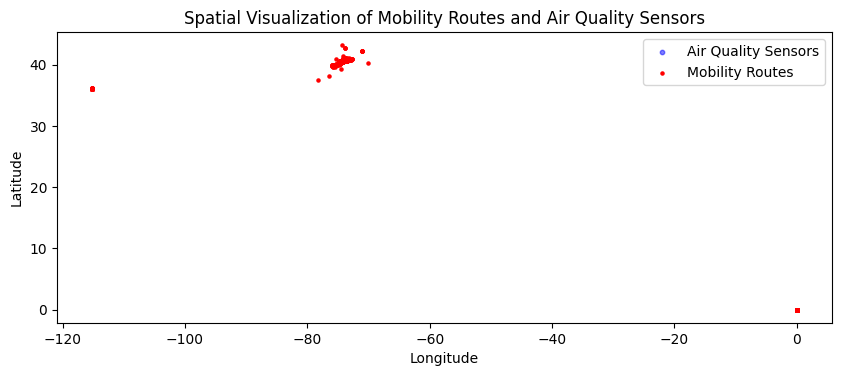

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Convert latitude and longitude to Point geometries
mobility_geometry = [Point(xy) for xy in zip(mobility_df['Pickup_longitude'], mobility_df['Pickup_latitude'])]
mobility_gdf = gpd.GeoDataFrame(mobility_df, geometry=mobility_geometry)

air_geometry = [Point(xy) for xy in zip(air_df['longitude'], air_df['latitude'])]
air_gdf = gpd.GeoDataFrame(air_df, geometry=air_geometry)

# Spatial Join
spatial_join = gpd.sjoin(mobility_gdf, air_gdf, op='intersects', how='inner')

# Spatial Visualization
fig, ax = plt.subplots(figsize=(10, 10))
air_gdf.plot(ax=ax, color='blue', alpha=0.5, markersize=10, label='Air Quality Sensors')
mobility_gdf.plot(ax=ax, color='red', markersize=5, label='Mobility Routes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Visualization of Mobility Routes and Air Quality Sensors')
plt.legend()
plt.show()

Insights: Spatial join operation did not find any intersections or overlaps between the mobility routes and the air quality sensor locations.

# Combining Mobility and Air Quality Data 01/04/2024




Check if both Datasets have Neighborhood & geohash columns

In [119]:
sjoined_air_quality_original.head()

SensorID        time   latitude  longitude  bin0  bin1  bin2  bin3  \
0  NYCP2_CS01A  1631277304  40.847672 -73.869316    11     1     1     0   
1  NYCP2_CS01A  1631277308  40.847668 -73.869316    22     4     1     0   
2  NYCP2_CS01A  1631277313  40.847649 -73.869362    40     1     1     0   
3  NYCP2_CS01A  1631277318  40.847649 -73.869362    26     1     0     0   
4  NYCP2_CS01A  1631277323  40.847649 -73.869362    44     4     0     1   

   bin4  bin5  ...  humidity      pm25  geohash_AQ  \
0     0     0  ...      57.3  4.508813      dr72rh   
1     0     2  ...      57.8  5.462420      dr72rh   
2     0     1  ...      57.8  5.154881      dr72rh   
3     0     0  ...      57.6  4.508813      dr72rh   
4     0     0  ...      57.5  5.539503      dr72rh   

                     geometry  index_right  neighborhood_AQ  boroughCode  \
0  POINT (-73.86932 40.84767)           38       Bronx Park            2   
1  POINT (-73.86932 40.84767)           38       Bronx Park            2   
2  POINT (-73.86936 40.84765)           38       Bronx Park            2   
3  POINT (-73.86936 40.84765)           38       Bronx Park            2   
4  POINT (-73.86936 40.84765)           38       Bronx Park            2   

   borough                                                @id  \
0    Bronx  http://nyc.pediacities.com/Resource/Neighborho...   
1    Bronx  http://nyc.pediacities.com/Resource/Neighborho...   
2    Bronx  http://nyc.pediacities.com/Resource/Neighborho...   
3    Bronx  http://nyc.pediacities.com/Resource/Neighborho...   
4    Bronx  http://nyc.pediacities.com/Resource/Neighborho...   

                                           geometryn  
0  POLYGON ((-8223164.965 4991107.997, -8223015.9...  
1  POLYGON ((-8223164.965 4991107.997, -8223015.9...  
2  POLYGON ((-8223164.965 4991107.997, -8223015.9...  
3  POLYGON ((-8223164.965 4991107.997, -8223015.9...  
4  POLYGON ((-8223164.965 4991107.997, -8223015.9...  

[5 rows x 39 columns]

In [120]:
sjoined_trips_original.head()

id  VendorID lpep_pickup_datetime Lpep_dropoff_datetime  \
582871    582871         2  2016-01-13 12:29:48   2016-01-13 12:38:38   
238245    238245         1  2016-01-05 21:16:26   2016-01-05 21:20:20   
965182    965182         2  2016-01-21 11:57:18   2016-01-21 12:07:12   
249549    249549         1  2016-01-06 08:36:10   2016-01-06 08:44:09   
1238953  1238953         2  2016-01-28 12:48:39   2016-01-28 12:55:27   

        Store_and_fwd_flag  RateCodeID  longitude   latitude  \
582871                   N           1 -73.947479  40.815212   
238245                   N           1 -73.951805  40.810345   
965182                   N           1 -73.942535  40.812027   
249549                   N           1 -73.947517  40.805176   
1238953                  N           1 -73.951614  40.799282   

         Dropoff_longitude  Dropoff_latitude  ...  Payment_type  Trip_type  \
582871          -73.938431         40.837742  ...             2        1.0   
238245          -73.941994         40.813728  ...             2        1.0   
965182          -73.932236         40.794918  ...             2        1.0   
249549          -73.953606         40.790920  ...             1        1.0   
1238953         -73.938911         40.814957  ...             2        1.0   

         geohash_mobility                    geometry  index_right  \
582871             dr72jq  POINT (-73.94748 40.81521)          128   
238245             dr72jj  POINT (-73.95181 40.81034)          128   
965182             dr72jm  POINT (-73.94254 40.81203)          128   
249549             dr72jk  POINT (-73.94752 40.80518)          128   
1238953            dr72j5  POINT (-73.95161 40.79928)          128   

         neighborhood_mobility  boroughCode    borough  \
582871                  Harlem            1  Manhattan   
238245                  Harlem            1  Manhattan   
965182                  Harlem            1  Manhattan   
249549                  Harlem            1  Manhattan   
1238953                 Harlem            1  Manhattan   

                                                       @id  \
582871   http://nyc.pediacities.com/Resource/Neighborho...   
238245   http://nyc.pediacities.com/Resource/Neighborho...   
965182   http://nyc.pediacities.com/Resource/Neighborho...   
249549   http://nyc.pediacities.com/Resource/Neighborho...   
1238953  http://nyc.pediacities.com/Resource/Neighborho...   

                                                 geometryn  
582871   POLYGON ((-8230358.427 4987026.661, -8230342.4...  
238245   POLYGON ((-8230358.427 4987026.661, -8230342.4...  
965182   POLYGON ((-8230358.427 4987026.661, -8230342.4...  
249549   POLYGON ((-8230358.427 4987026.661, -8230342.4...  
1238953  POLYGON ((-8230358.427 4987026.661, -8230342.4...  

[5 rows x 30 columns]

Rename columns

In [121]:

# Rename columns to match
sjoined_air_quality_original.rename(columns={'neighborhood': 'neighborhood_AQ', 'geohash': 'geohash_AQ'}, inplace=True)
sjoined_trips_original.rename(columns={'neighborhood': 'neighborhood_mobility', 'geohash': 'geohash_mobility'}, inplace=True)

# Verify column names after renaming
print(sjoined_air_quality_original.columns)
print(sjoined_trips_original.columns)
print("Length of sjoined_air_quality_original is ",len(sjoined_air_quality_original) )
print ("Length of sjoined_trips_original is ",len(sjoined_trips_original) )







Index(['SensorID', 'time', 'latitude', 'longitude', 'bin0', 'bin1', 'bin2',
       'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10',
       'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16', 'bin17', 'bin18',
       'bin19', 'bin20', 'bin21', 'bin22', 'bin23', 'temperature', 'humidity',
       'pm25', 'geohash_AQ', 'geometry', 'index_right', 'neighborhood_AQ',
       'boroughCode', 'borough', '@id', 'geometryn'],
      dtype='object')
Index(['id', 'VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'longitude', 'latitude',
       'Dropoff_longitude', 'Dropoff_latitude', 'Passenger_count',
       'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax', 'Tip_amount',
       'Tolls_amount', 'Ehail_fee', 'improvement_surcharge', 'Total_amount',
       'Payment_type', 'Trip_type', 'geohash_mobility', 'geometry',
       'index_right', 'neighborhood_mobility', 'boroughCode', 'borough', '@id',
       'geometryn'],
      dtype='ob

check if data type of neighborhoods and geohash is the same in each dataset

In [122]:
# Get the data types of 'neighborhood_AQ' and 'geohash_AQ' columns
neighborhood_AQ_dtype = sjoined_air_quality_original['neighborhood_AQ'].dtype
geohash_AQ_dtype = sjoined_air_quality_original['geohash_AQ'].dtype
# Print the data types
print("Data type of 'neighborhood_AQ':", neighborhood_AQ_dtype)
print("Data type of 'geohash_AQ':", geohash_AQ_dtype)

# Get the data types of 'neighborhood_mobility' and 'geohash_mobility' columns
neighborhood_mobility_dtype = sjoined_trips_original['neighborhood_mobility'].dtype
geohash_mobility_dtype = sjoined_trips_original['geohash_mobility'].dtype
# Print the data types
print("Data type of 'neighborhood_mobility':", neighborhood_mobility_dtype)
print("Data type of 'geohash_mobility':", geohash_mobility_dtype)

Data type of 'neighborhood_AQ': object
Data type of 'geohash_AQ': object
Data type of 'neighborhood_mobility': object
Data type of 'geohash_mobility': object


perfome merge in increments to be memory effecient

In [132]:
# Define chunk size for incremental merge
chunk_size = 10000

# Split the dataframes into chunks
chunks_air_quality = [sjoined_air_quality_original[i:i + chunk_size] for i in range(0, len(sjoined_air_quality_original), chunk_size)]
chunks_mobility = [sjoined_trips_original[i:i + chunk_size] for i in range(0, len(sjoined_trips_original), chunk_size)]

# Initialize an empty list to store merged chunks
merged_chunks = []

# Perform incremental merge with outer join
for chunk_air_quality, chunk_mobility in zip(chunks_air_quality, chunks_mobility):
    merged_chunk = pd.merge(chunk_air_quality, chunk_mobility,
                            left_on=['neighborhood_AQ', 'geohash_AQ'],
                            right_on=['neighborhood_mobility', 'geohash_mobility'],
                            how='inner')  # Changed to outer join
    merged_chunks.append(merged_chunk)

# Concatenate the merged chunks into a single dataframe
merged_data = pd.concat(merged_chunks)
print(merged_data.head())


      SensorID        time  latitude_x  longitude_x  bin0  bin1  bin2  bin3  \
0  NYCP2_CS02A  1635518566   40.711689   -73.934052     1     0     0     0   
1  NYCP2_CS02A  1635518566   40.711689   -73.934052     1     0     0     0   
2  NYCP2_CS02A  1635518566   40.711689   -73.934052     1     0     0     0   
3  NYCP2_CS02A  1635518566   40.711689   -73.934052     1     0     0     0   
4  NYCP2_CS02A  1635518566   40.711689   -73.934052     1     0     0     0   

   bin4  bin5  ...  Payment_type  Trip_type  geohash_mobility  \
0     0     0  ...             1        1.0            dr5rte   
1     0     0  ...             2        1.0            dr5rte   
2     0     0  ...             1        1.0            dr5rte   
3     0     0  ...             2        1.0            dr5rte   
4     0     0  ...             1        1.0            dr5rte   

                   geometry_y  index_right_y  neighborhood_mobility  \
0  POINT (-73.93573 40.71451)            303           Williams

In [136]:
print(merged_data.columns)

Index(['SensorID', 'time', 'latitude_x', 'longitude_x', 'bin0', 'bin1', 'bin2',
       'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10',
       'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16', 'bin17', 'bin18',
       'bin19', 'bin20', 'bin21', 'bin22', 'bin23', 'temperature', 'humidity',
       'pm25', 'geohash_AQ', 'geometry_x', 'index_right_x', 'neighborhood_AQ',
       'boroughCode_x', 'borough_x', '@id_x', 'geometryn_x', 'id', 'VendorID',
       'lpep_pickup_datetime', 'Lpep_dropoff_datetime', 'Store_and_fwd_flag',
       'RateCodeID', 'longitude_y', 'latitude_y', 'Dropoff_longitude',
       'Dropoff_latitude', 'Passenger_count', 'Trip_distance', 'Fare_amount',
       'Extra', 'MTA_tax', 'Tip_amount', 'Tolls_amount', 'Ehail_fee',
       'improvement_surcharge', 'Total_amount', 'Payment_type', 'Trip_type',
       'geohash_mobility', 'geometry_y', 'index_right_y',
       'neighborhood_mobility', 'boroughCode_y', 'borough_y', '@id_y',
       'geometryn_y'],
      

In [137]:
merged_data.head()

SensorID        time  latitude_x  longitude_x  bin0  bin1  bin2  bin3  \
0  NYCP2_CS02A  1635518566   40.711689   -73.934052     1     0     0     0   
1  NYCP2_CS02A  1635518566   40.711689   -73.934052     1     0     0     0   
2  NYCP2_CS02A  1635518566   40.711689   -73.934052     1     0     0     0   
3  NYCP2_CS02A  1635518566   40.711689   -73.934052     1     0     0     0   
4  NYCP2_CS02A  1635518566   40.711689   -73.934052     1     0     0     0   

   bin4  bin5  ...  Payment_type  Trip_type  geohash_mobility  \
0     0     0  ...             1        1.0            dr5rte   
1     0     0  ...             2        1.0            dr5rte   
2     0     0  ...             1        1.0            dr5rte   
3     0     0  ...             2        1.0            dr5rte   
4     0     0  ...             1        1.0            dr5rte   

                   geometry_y  index_right_y  neighborhood_mobility  \
0  POINT (-73.93573 40.71451)            303           Williamsburg   
1  POINT (-73.93793 40.71267)            303           Williamsburg   
2  POINT (-73.93499 40.71387)            303           Williamsburg   
3  POINT (-73.93469 40.71325)            303           Williamsburg   
4  POINT (-73.93690 40.71292)            303           Williamsburg   

   boroughCode_y  borough_y  \
0              4   Brooklyn   
1              4   Brooklyn   
2              4   Brooklyn   
3              4   Brooklyn   
4              4   Brooklyn   

                                               @id_y  \
0  http://nyc.pediacities.com/Resource/Neighborho...   
1  http://nyc.pediacities.com/Resource/Neighborho...   
2  http://nyc.pediacities.com/Resource/Neighborho...   
3  http://nyc.pediacities.com/Resource/Neighborho...   
4  http://nyc.pediacities.com/Resource/Neighborho...   

                                         geometryn_y  
0  POLYGON ((-8232919.255 4971877.704, -8232410.0...  
1  POLYGON ((-8232919.255 4971877.704, -8232410.0...  
2  POLYGON ((-8232919.255 4971877.704, -8232410.0...  
3  POLYGON ((-8232919.255 4971877.704, -8232410.0...  
4  POLYGON ((-8232919.255 4971877.704, -8232410.0...  

[5 rows x 69 columns]

In [138]:
len(merged_data)

54

The merge is performed on two criteria:
Neighborhood: The 'neighborhood_AQ' column from sjoined_air_quality_original is matched with the 'neighborhood_mobility' column from sjoined_trips_original.
Geohash: The 'geohash_AQ' column from sjoined_air_quality_original is matched with the 'geohash_mobility' column from sjoined_trips_original.
Only rows where both neighborhood and geohash match between the datasets are included in the merged dataset.

# Visualising merged data

In [139]:
# Import libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns


### Generating Heatmaps based on Longitude and Latitude

In [140]:
# Prepare GeoDataFrame
# Latitude and longitude columns for the air quality data
gdf_air_quality = gpd.GeoDataFrame(merged_data, geometry=gpd.points_from_xy(merged_data.longitude_x, merged_data.latitude_x))

# latitude and longitude columns for the mobility data
gdf_mobility = gpd.GeoDataFrame(merged_data, geometry=gpd.points_from_xy(merged_data.longitude_y, merged_data.latitude_y))

<ipython-input-141-dad617678452>:2: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=gdf_air_quality, x='longitude_x', y='latitude_x', fill=True, cmap='Blues', levels=30)


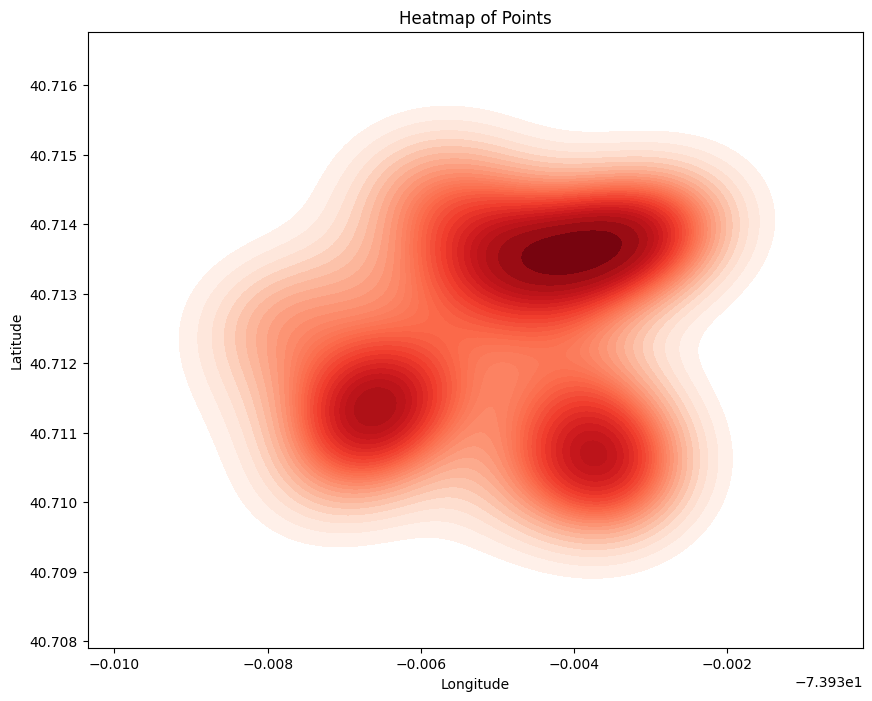

In [141]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data=gdf_air_quality, x='longitude_x', y='latitude_x', fill=True, cmap='Blues', levels=30)
sns.kdeplot(data=gdf_mobility, x='longitude_y', y='latitude_y', fill=True, cmap='Reds', levels=30)
plt.title('Heatmap of Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [143]:
import pandas as pd
import folium
from folium.plugins import HeatMap

data = merged_data[['latitude_y', 'longitude_y', 'temperature']]

# Check population size and sample size
population_size = len(data)
sample_size = 100000

if sample_size > population_size:
    print("Sample size is larger than the population size. Adjusting sample size.")
    sample_size = min(sample_size, population_size)

# Sample a subset of data
sampled_data = data.sample(n=sample_size, replace=False)  # Sample without replacement

# Generate base map
base_map_merged = folium.Map(location=[sampled_data['latitude_y'].mean(), sampled_data['longitude_y'].mean()], zoom_start=10)

# Create HeatMap layer
HeatMap(data=sampled_data[['latitude_y', 'longitude_y', 'temperature']].values.tolist(),
        radius=8, max_zoom=13).add_to(base_map_merged)

# Display the map
base_map_merged


Sample size is larger than the population size. Adjusting sample size.


### Histograms

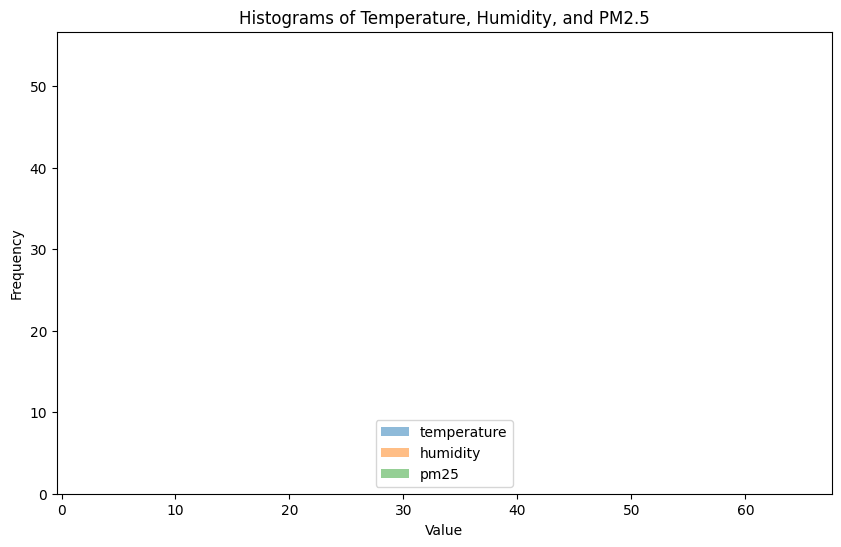

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns for study
selected_columns = ['temperature', 'humidity', 'pm25']

# Plot histograms using matplotlib
plt.figure(figsize=(10, 6))
for column in selected_columns:
    plt.hist(merged_data[column], bins=30, alpha=0.5, label=column)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Temperature, Humidity, and PM2.5')
plt.legend()
plt.show()




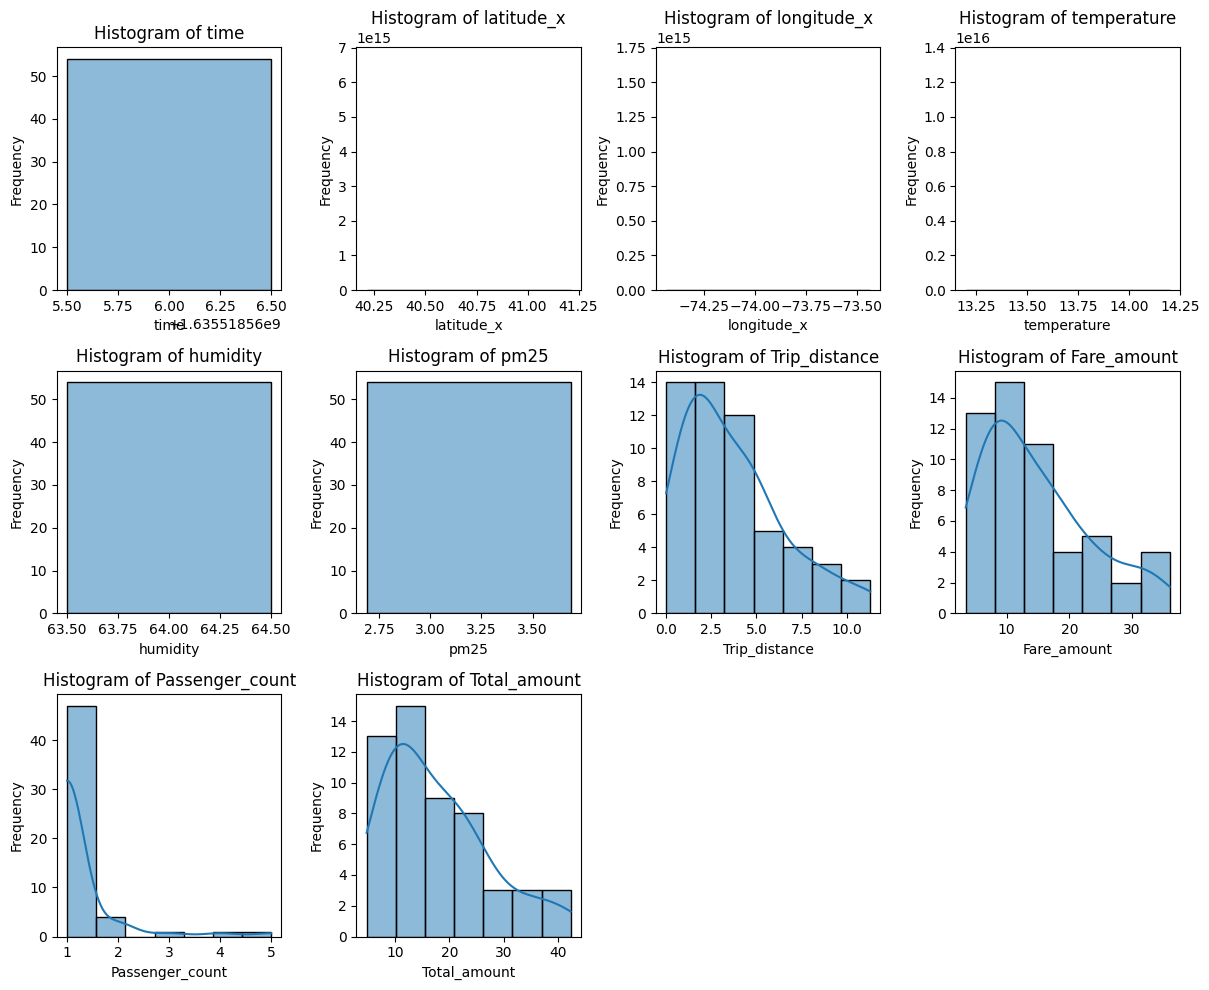

In [149]:
# Plot histograms for selected numerical columns
selected_numeric_columns = ['time', 'latitude_x', 'longitude_x', 'temperature', 'humidity', 'pm25',
                            'Trip_distance', 'Fare_amount', 'Passenger_count', 'Total_amount']

plt.figure(figsize=(12, 10))
for i, column in enumerate(selected_numeric_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data=merged_data, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
